# Import

In [1]:
# Importing all the necessary libraries
import random
import matplotlib.pyplot as plt
import json
import networkx as nx
from networkx.readwrite import json_graph

# Declaring all the constants
MATRIX_SIDE = 10
NO_FG_NODES = 20

COLOR_BG = "#a8dadc"
COLOR_FG = "#457b9d"
SIZE_BG_NODES = 800
SIZE_FG_NODES = 2400

WEIGHT_BG_EDGES = 4
WEIGHT_FG_EDGES = 24

FIG_SIZE = (12, 12)


# Activity 2

## 2.1 Sub-activity: Graph creation

### Task 1

In [2]:
# Initializing an empty graph
matrix_graph = nx.Graph()

# Adding background nodes to the matrix_graph
for i in range(MATRIX_SIDE):
    for j in range(MATRIX_SIDE):
        node_id = f"{i}-{j}"  # Converting (i, j) tuple to string "i-j"
        # Adding node with required attributes
        matrix_graph.add_node(
            node_id,  
            node_type="background", 
            color= COLOR_BG,  
            size = SIZE_BG_NODES 
        )
        

### Task 2

In [3]:
foreground_node_count = 0

while foreground_node_count < NO_FG_NODES:
    # Generating random values for row and column indices, avoiding the borders
    r = random.randint(1, MATRIX_SIDE - 2)  # Avoiding the border rows
    c = random.randint(1, MATRIX_SIDE - 2)  # Avoiding the border columns
    
    # Creating node ID as a string "r-c"
    node_id = f"{r}-{c}"
        
    # Checking if the current node is not a foreground node 
    if matrix_graph.nodes[node_id]["node_type"] != "foreground":
        # Updating the type of node to foreground along with it's properties
        matrix_graph.nodes[node_id]["node_type"] = "foreground"
        matrix_graph.nodes[node_id]["color"] = COLOR_FG  
        matrix_graph.nodes[node_id]["size"] = SIZE_FG_NODES 
        
        foreground_node_count += 1  # Increasing the count after the node is successfully updated to foreground.

### Task 3

In [4]:
# Iterating through the nodes in the matrix graph
for i in range(MATRIX_SIDE):
    for j in range(MATRIX_SIDE):
        
        node_id = f"{i}-{j}"  # Converting (i, j) indices to a string "i-j" as an id.

        # Cases for Background nodes 
        if matrix_graph.nodes[node_id]["node_type"] == "background":
            # Adding Horizontal Edge to Right
            if j != MATRIX_SIDE - 1:  # Checking if the current column is not the right most
                right_node = f"{i}-{j+1}"
                if matrix_graph.nodes[right_node]["node_type"] == "background": # Checking if the right node is also a background node
                    if not matrix_graph.has_edge(node_id, right_node):  # If edge is not already present
                        # Add an edge with all the required properties
                        matrix_graph.add_edge(
                            node_id, 
                            right_node, 
                            weight=WEIGHT_BG_EDGES, 
                            color=COLOR_BG
                        )
            
            # Adding Vertical Edge to bottom
            if i != MATRIX_SIDE - 1:   # Checking if the current row is not the last row
                bottom_node = f"{i+1}-{j}"
                if matrix_graph.nodes[bottom_node]["node_type"] == "background": # Checking if the bottom node is also a background node
                    if not matrix_graph.has_edge(node_id, bottom_node):  # If edge is not already present
                        # Add an edge with all the required properties
                        matrix_graph.add_edge(
                            node_id, 
                            bottom_node, 
                            weight=WEIGHT_BG_EDGES, 
                            color=COLOR_BG
                        )
            
            # Adding Diagonal Edge to Bottom-Right 
            if i != MATRIX_SIDE - 1 and j != MATRIX_SIDE - 1:  # Checking if the current node is not the node in last row and last column
                bottom_right_node = f"{i+1}-{j+1}"
                if matrix_graph.nodes[bottom_right_node]["node_type"] == "background": # Checking if the bottom right node is also a background node
                    if not matrix_graph.has_edge(node_id, bottom_right_node): # If edge is not already present
                        # Add an edge with all the required properties
                        matrix_graph.add_edge(
                            node_id, 
                            bottom_right_node, 
                            weight=WEIGHT_BG_EDGES, 
                            color=COLOR_BG
                        )
            
            # Adding Diagonal Edge to Bottom-Left 
            if i != MATRIX_SIDE - 1 and j != 0:  # Checking if the current node is not the node in last row and first column
                bottom_left_node = f"{i+1}-{j-1}"
                if matrix_graph.nodes[bottom_left_node]["node_type"] == "background": # Checking if the bottom left node is also a background node
                    if not matrix_graph.has_edge(node_id, bottom_left_node):  # If edge is not already present
                        # Add an edge with all the required properties
                        matrix_graph.add_edge(
                            node_id, 
                            bottom_left_node, 
                            weight=WEIGHT_BG_EDGES, 
                            color=COLOR_BG
                        )

            # Adding Horizontal Edge to Left
            if j > 0:  # Checking if the current column is not the left most
                left_node = f"{i}-{j-1}"
                if matrix_graph.nodes[left_node]["node_type"] == "background": # Checking if the left node is also a background node
                    if not matrix_graph.has_edge(node_id, left_node):  # If edge is not already present
                        # Add an edge with all the required properties
                        matrix_graph.add_edge(
                            node_id, 
                            left_node, 
                            weight=WEIGHT_BG_EDGES, 
                            color=COLOR_BG
                        )

            # Adding Diagonal Edge to Top-Left 
            if i > 0 and j > 0:  # Checking if the current node is not the node in first row and first column
                top_left_node = f"{i-1}-{j-1}"
                if matrix_graph.nodes[top_left_node]["node_type"] == "background": # Checking if the top left node is also a background node
                    if not matrix_graph.has_edge(node_id, top_left_node):  # If edge is not already present
                        # Add an edge with all the required properties
                        matrix_graph.add_edge(
                            node_id, 
                            top_left_node, 
                            weight=WEIGHT_BG_EDGES, 
                            color=COLOR_BG
                        )

            # Adding Diagonal Edge to Top-Right 
            if i > 0 and j < MATRIX_SIDE - 1:  # Checking if the current node is not the node in first row and last column
                top_right_node = f"{i-1}-{j+1}"
                if matrix_graph.nodes[top_right_node]["node_type"] == "background": # Checking if the bottom left right node is also a background node
                    if not matrix_graph.has_edge(node_id, top_right_node): # If edge is not already present
                        # Add an edge with all the required properties
                        matrix_graph.add_edge(
                            node_id, 
                            top_right_node, 
                            weight=WEIGHT_BG_EDGES, 
                            color=COLOR_BG
                        )
        
        # Cases for Foreground nodes 
        elif matrix_graph.nodes[node_id]["node_type"] == "foreground": 
            # Add Horizontal Edge to Right
            if j != MATRIX_SIDE - 1:  # Checking if the current column is not the right most
                right_node = f"{i}-{j+1}"
                if matrix_graph.nodes[right_node]["node_type"] == "foreground": # Checking if the right node is also a foreground node
                    if not matrix_graph.has_edge(node_id, right_node):  # If edge is not already present
                        # Add an edge with all the required properties
                        matrix_graph.add_edge(
                            node_id, 
                            right_node, 
                            weight=WEIGHT_FG_EDGES, 
                            color=COLOR_FG
                        )
            
            # Add Vertical Edge to Bottom (Vertical)
            if i != MATRIX_SIDE - 1:  # Checking if the current row is not the last row
                bottom_node = f"{i+1}-{j}"
                if matrix_graph.nodes[bottom_node]["node_type"] == "foreground": # Checking if the bottom node is also a foreground node
                    if not matrix_graph.has_edge(node_id, bottom_node):  # If edge is not already present
                        # Add an edge with all the required properties
                        matrix_graph.add_edge(
                            node_id, 
                            bottom_node, 
                            weight=WEIGHT_FG_EDGES, 
                            color=COLOR_FG
                        )


print("All Foreground and Background Edges Successfully added to the graph.")

All Foreground and Background Edges Successfully added to the graph.


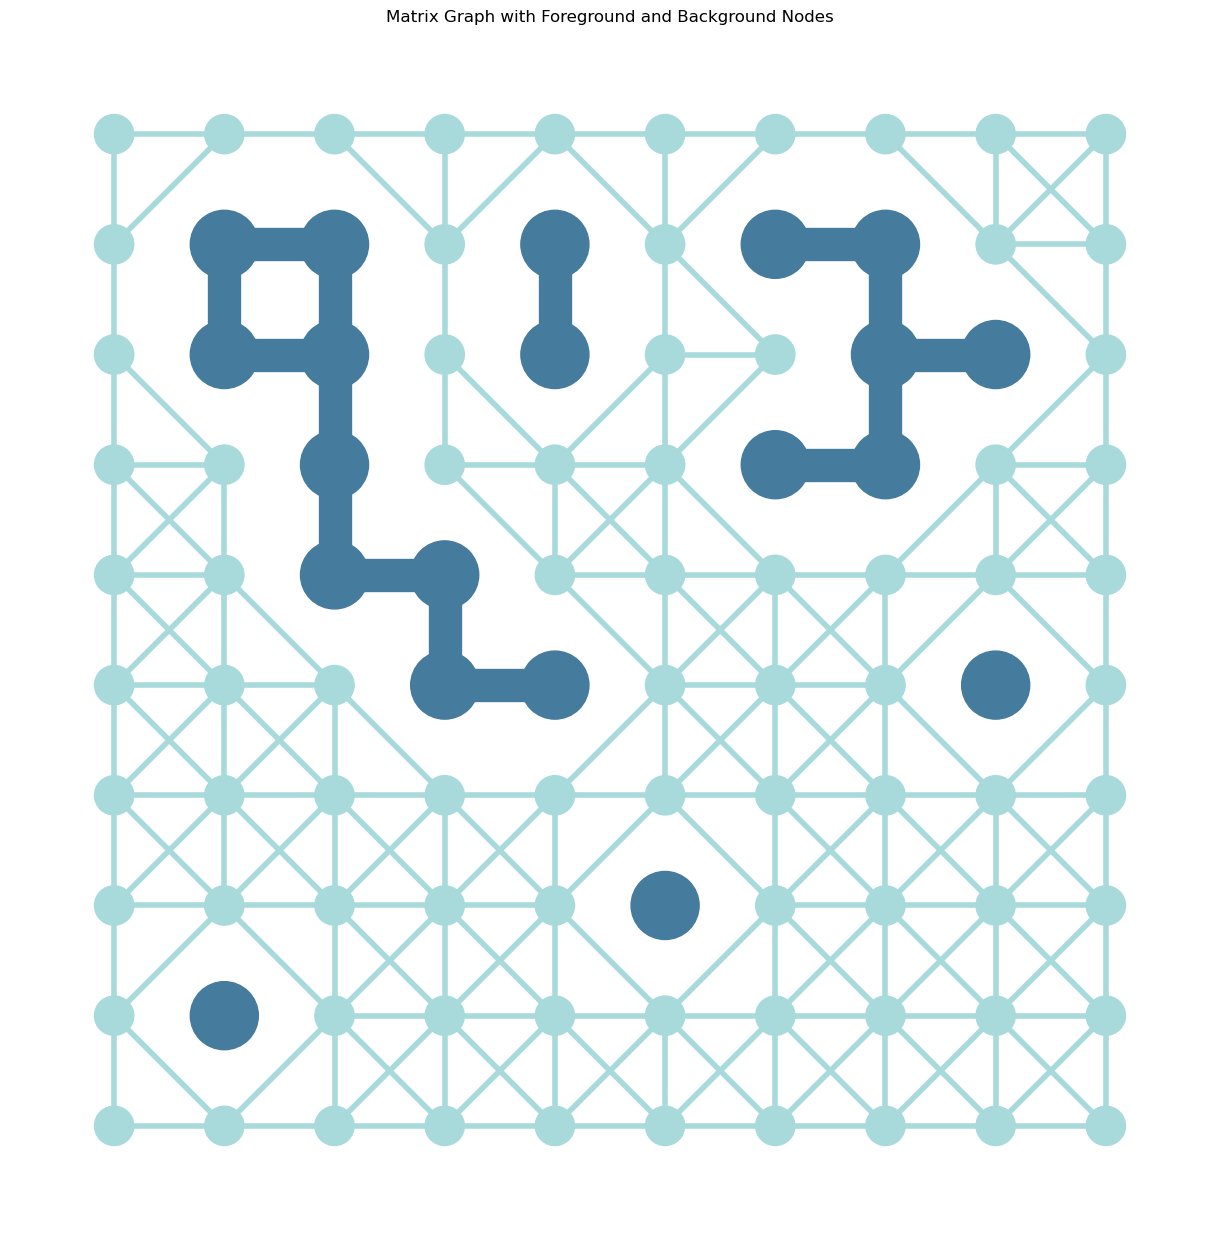

In [5]:
# OPTIONAL:  Displaying the final graphs with all edges connected.
plt.figure(figsize=FIG_SIZE)

# Drawing the graph using the specified node and edge attributes
nx.draw(
    matrix_graph,
    pos={f"{i}-{j}": (j, -i) for i in range(MATRIX_SIDE) for j in range(MATRIX_SIDE)},
    node_color=[matrix_graph.nodes[node]["color"] for node in matrix_graph.nodes()],
    node_size=[matrix_graph.nodes[node]["size"] for node in matrix_graph.nodes()],
    width=[matrix_graph[u][v]["weight"] for u, v in matrix_graph.edges()],
    edge_color=[matrix_graph[u][v]["color"] for u, v in matrix_graph.edges()],
    with_labels=False,  
)

plt.title("Matrix Graph with Foreground and Background Nodes")
plt.show()


## 2.2 Sub-activity: Graph manipulation and output

### Task 4

In [6]:

# As discussed on KEATS Forums nx.info()is outdated so will be calculating number of nodes, number of edges and the average degree of nodes in the network.

# Number of Nodes
num_nodes = matrix_graph.number_of_nodes()
print(f"Number of Nodes: {num_nodes}")

# Number of Edges
num_edges = matrix_graph.number_of_edges()
print(f"Number of Edges: {num_edges}")

# Average Degree 
total_degree = 0
for node in matrix_graph.nodes():
    total_degree += matrix_graph.degree(node)
avg_degree = total_degree / num_nodes
print(f"Average Degree: {avg_degree:.4f}")

# Calculate and print the graph density
density = nx.density(matrix_graph)
print(f"\nGraph Density: {density:.4f}")


# Calculate degree centrality for all nodes
degree_centrality = nx.degree_centrality(matrix_graph)

print("\nDegree Centrality of Nodes:")
for node, centrality in degree_centrality.items():
    print(f"Node {node}: {centrality:.4f}") # Printing the centrality of nodes to 4 decimal places

Number of Nodes: 100
Number of Edges: 222
Average Degree: 4.4400

Graph Density: 0.0448

Degree Centrality of Nodes:
Node 0-0: 0.0202
Node 0-1: 0.0303
Node 0-2: 0.0303
Node 0-3: 0.0303
Node 0-4: 0.0404
Node 0-5: 0.0303
Node 0-6: 0.0303
Node 0-7: 0.0303
Node 0-8: 0.0404
Node 0-9: 0.0303
Node 1-0: 0.0303
Node 1-1: 0.0202
Node 1-2: 0.0202
Node 1-3: 0.0404
Node 1-4: 0.0101
Node 1-5: 0.0505
Node 1-6: 0.0101
Node 1-7: 0.0202
Node 1-8: 0.0505
Node 1-9: 0.0404
Node 2-0: 0.0303
Node 2-1: 0.0202
Node 2-2: 0.0303
Node 2-3: 0.0303
Node 2-4: 0.0101
Node 2-5: 0.0404
Node 2-6: 0.0303
Node 2-7: 0.0303
Node 2-8: 0.0101
Node 2-9: 0.0404
Node 3-0: 0.0404
Node 3-1: 0.0404
Node 3-2: 0.0202
Node 3-3: 0.0303
Node 3-4: 0.0606
Node 3-5: 0.0606
Node 3-6: 0.0101
Node 3-7: 0.0202
Node 3-8: 0.0505
Node 3-9: 0.0404
Node 4-0: 0.0505
Node 4-1: 0.0606
Node 4-2: 0.0202
Node 4-3: 0.0202
Node 4-4: 0.0505
Node 4-5: 0.0606
Node 4-6: 0.0606
Node 4-7: 0.0505
Node 4-8: 0.0606
Node 4-9: 0.0404
Node 5-0: 0.0505
Node 5-1: 0.0707

### Task 5

In [7]:
# Converting the graph to JSON object
graph_data = json_graph.node_link_data(matrix_graph)

# Writing the graph data to a JSON file
with open("graph_data.json", 'w') as json_file:
    json.dump(graph_data, json_file, indent=4)

print(f"Matrix Graph successfully saved to 'graph_data.json'")

Matrix Graph successfully saved to 'graph_data.json'
